# Homework 7
> PHZ4710 - Introduction to Biological Physics, University of Florida, Spring 2023

## Dimensionality reduction of handwritten digits

We have learned to classify handwritten digits into 10 categories according to the numbers they represent. It suggests that, even though the images are high-dimensional (28x28 pixels = 784 dimensions), the actual information content is much lower than that. An obvious evidence is that most images have a lot of white space near the margins, which does no vary between images and so carries no information. Therefore, we should be able to reduce the dimensionality of the data while still preserving the information. Let us try to do so using Principal Component Analysis (PCA). The idea is to find the dimensions (or "features") that capture the most variation between images.

**1**. Load the MNIST dataset. You may simply load the [mnist.npz](data/mnist.npz) file uploaded to our course website. We will use the `test_images` array as our data, which contains $N=10000$ images. Flatten each image from a (28,28) 2-d array to a 1-d vector. Your data should now be of shape (10000,784), where 10000 is the number of data points, and 784 is the dimensionality of the data space that we wish to reduce. We will denote this dataset by $X_{ni}$ for $n = 1, \cdots, 10000$ and $i = 1, \cdots, 784$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = np.load('mnist.npz')
test_images = mnist['test_images']
X_ni = np.reshape(test_images,[10000,784])
X_ni.shape # making sure shape is correct

(10000, 784)

**2**. Calculate the covariance matrix of the data points. First, calculate the mean of all data points; this should be a 1-d vector with 784 components, i.e., $\bar{X}_i$ for $i = 1, \cdots, 784$. Then, subtract the mean from every data point; this should result in a "centered" dataset of the same shape (10000,784), i.e., $\tilde{X}_{ni} = X_{ni} - \bar{X}_i$. Finally, calculate the covariance matrix by $C_{ij} = \frac{1}{N} \sum_{n=1}^{N} \tilde{X}_{ni} \tilde{X}_{nj}$; this should yield a square matrix of shape (784,784).

In [3]:
N = X_ni.shape[0]

X_ni_mean = np.mean(X_ni, axis=0)
X_ni_centered = X_ni - X_ni_mean
cov = np.dot(X_ni_centered.T,X_ni_centered)/N
cov.shape # making sure shape is correct

(784, 784)

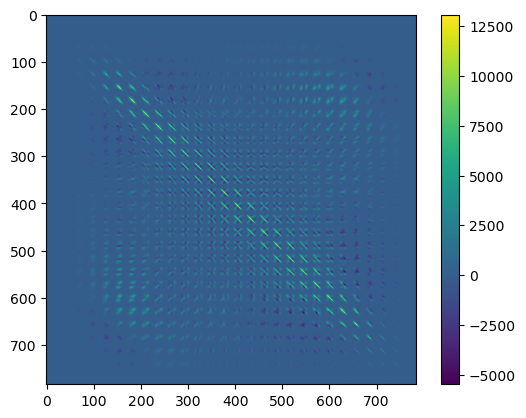

In [4]:
plt.figure() # Plotting visualization of covariance matrix (colormap) for observation structure
plt.imshow(cov)
plt.colorbar()
plt.show()

**3**. Calculate the eigenvalues and eigenvectors of the covariance matrix. Since the matrix is real symmetric, the eigenvalues and eigenvectors should all be real. Sort the eigenvalues so that they are in descending order, i.e., largest first; denote them by $w_k$. Sort the eigenvectors accordingly, denoted by $v_{ik}$. Normalize the eigenvalues by $\bar{w}_k = w_k / \sum_l w_l$. These normalized numbers represent how much variance each eigenmode captures from the data. Calculate their cumulative sum and plot the result. How many modes do you need in order to capture, say, 85% of the variance? Let this number be $K$, which should be $\ll 784$.

In [5]:
w, v = np.linalg.eigh(cov)

sort = np.argsort(w)[::-1]
w_k = w[sort]
v_ik = v[:,sort]

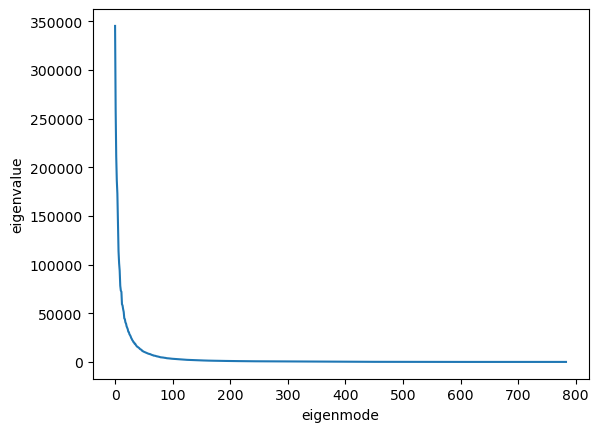

In [6]:
plt.figure() # To see how many PC we should keep
plt.plot(w_k)
plt.xlabel('eigenmode')
plt.ylabel('eigenvalue')
plt.show()

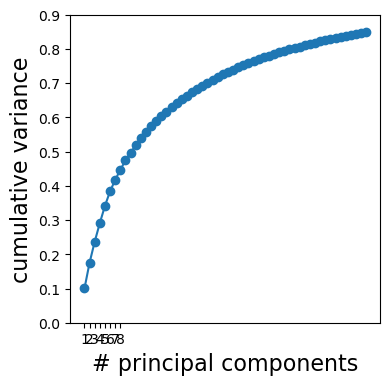

In [7]:
wbar_k = w_k / np.sum(w_k)
wbar_k_sum = np.cumsum(wbar_k)

plt.figure(figsize=(4,4))
plt.plot(np.arange(1,57), wbar_k_sum[:56], 'o-')
plt.ylim(0, .9)
plt.xticks(np.arange(1,9))
plt.xlabel('# principal components', fontsize=16)
plt.ylabel('cumulative variance', fontsize=16)
plt.show()

In [8]:
wbar_k_sum[56]

0.8512298478803231

In [9]:
K = 56

**4**. Take the first $K$ eigenvectors and plot them. You need to first convert each eigenvector back to a (28,28) array, then plot it as an image. These are the "features" that you found. See if they look like something that you can interpret.

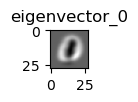

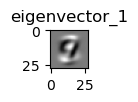

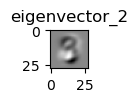

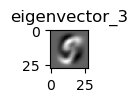

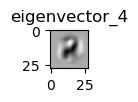

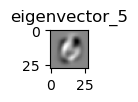

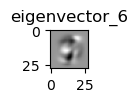

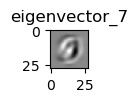

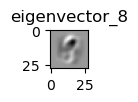

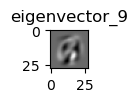

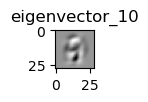

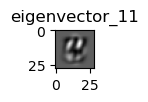

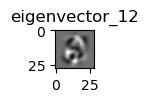

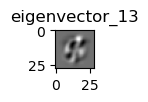

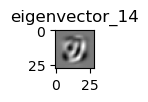

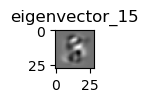

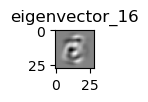

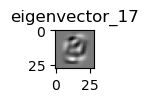

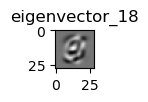

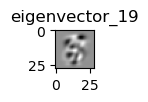

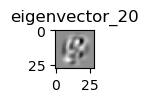

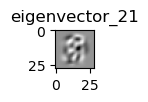

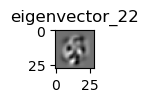

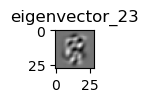

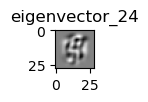

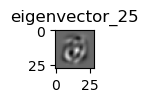

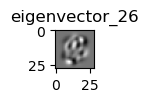

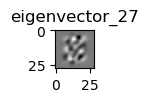

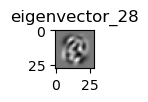

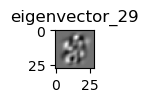

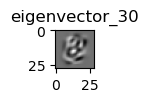

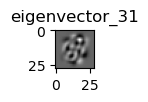

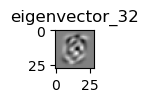

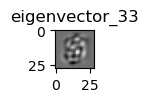

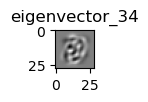

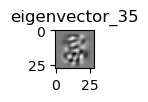

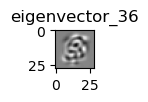

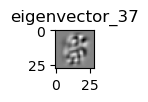

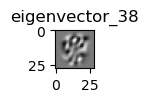

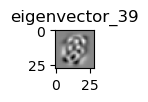

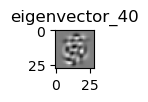

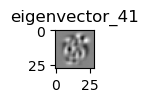

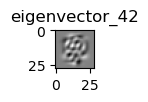

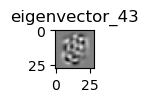

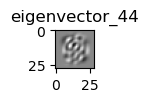

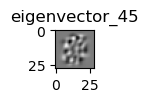

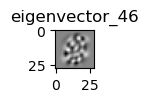

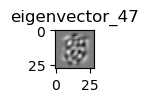

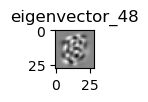

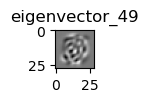

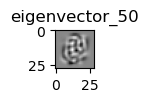

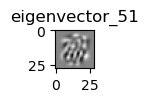

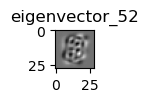

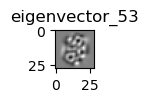

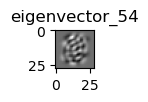

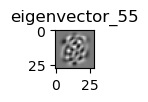

In [10]:
PC = v_ik[:,:K]
PC_img = np.reshape(PC.T, (K,28,28)) #Transpose images make recognizable structure easier to see

for i in range(K):
    plt.figure(figsize=(1,0.5))
    plt.imshow(PC_img[i],cmap = 'gray')
    plt.title(f'eigenvector_{i}')
    plt.show()


After the 10th eigenvector it is difficult to interpret what the principal component represents. A comment attached to the last submission: Although the eigenvectors get more complex as K rises, it can be seen that the earlier components make up more of a critical role in the creation of the test images. In other words, it can be seen that the components can be combined to form each and every image of the data set!

**5**. Project the original data onto those $K$ eigenvectors, i.e., $Y_{nk} = \sum_i X_{ni} v_{ik}$ for $k = 1, \cdots, K$. These $Y_{nk}$ are the Principal Components (PC) for each data point $n$. We will use them to reconstruct the images. This can be done by $\hat{X}_{ni} = \sum_k Y_{nk} v_{ik} = \sum_k Y_{nk} (v^\top)_{ki}$, where $v^\top$ is the transpose of $v$, or in numpy language, `v.T`. Take a few random indices $n$ and plot the reconstructed data $\hat{X}_{ni}$ (convert to (28,28) arrays first). Then plot the original data $X_{ni}$ to compare. Do the reconstructed data look similar to the original?

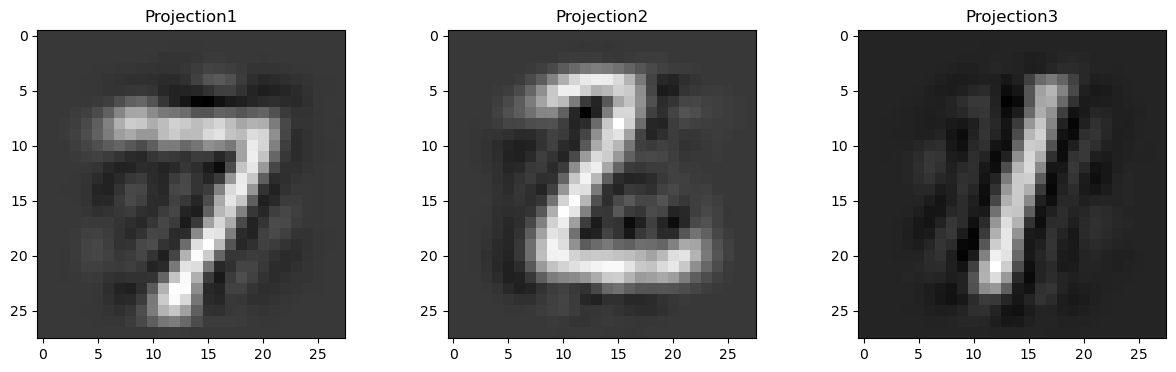

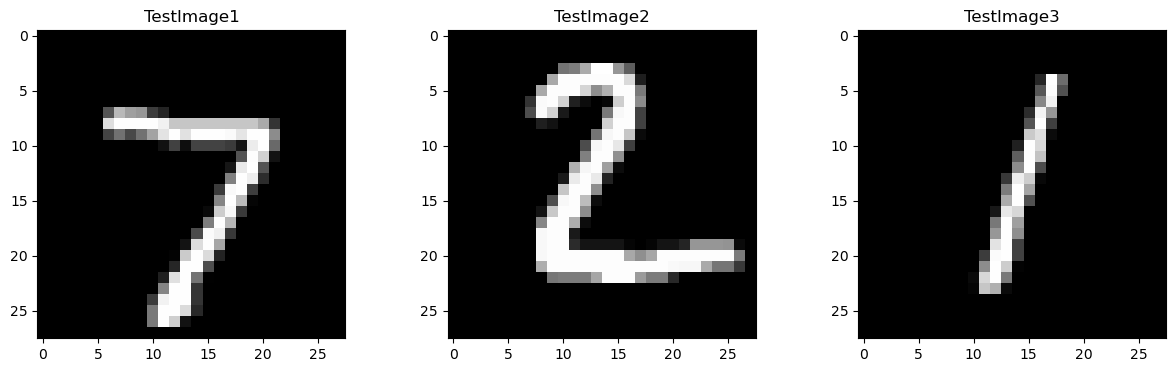

In [11]:
Y_nk = np.dot(X_ni,PC)
Xhat_ni = np.dot(Y_nk,PC.T)
Xhat_ni_plot = np.reshape(Xhat_ni,[10000,28,28])

n = 3

fig, ax = plt.subplots(1,n, figsize=(5*n,4))
for i in range(n):
    ax[i].imshow(Xhat_ni_plot[i,:,:],cmap = 'gray')
    ax[i].set_title(f'Projection{i+1}')
plt.show()

fig, ax = plt.subplots(1,n, figsize=(5*n,4))
for i in range(n):
    ax[i].imshow(test_images[i,:,:],cmap = 'gray')
    ax[i].set_title(f'TestImage{i+1}')
plt.show()

The reconstructed data looks very similar to the original, but not entirely identical because only 56 out of 728 principal components were used for the dimensionality reduction (85% cumulative variance). As seen below, using 111 components (93% cumulative variance) will have the projection be much more accurate, albiet not necessary.

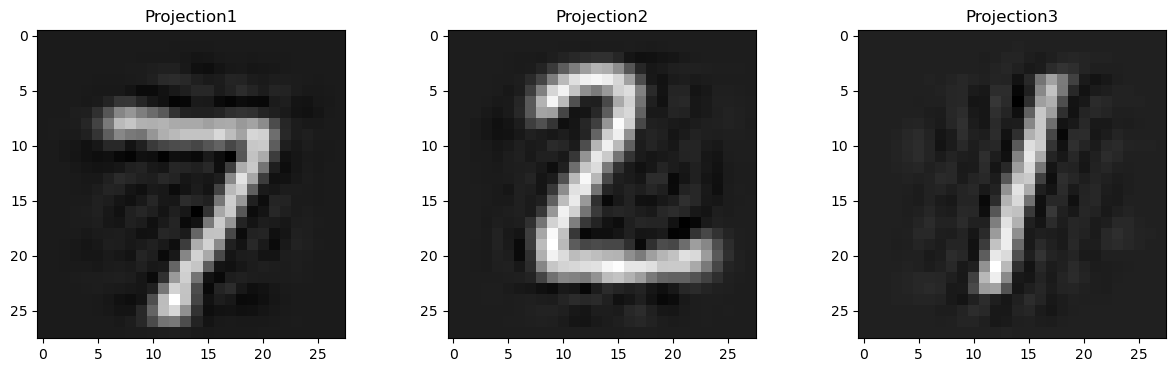

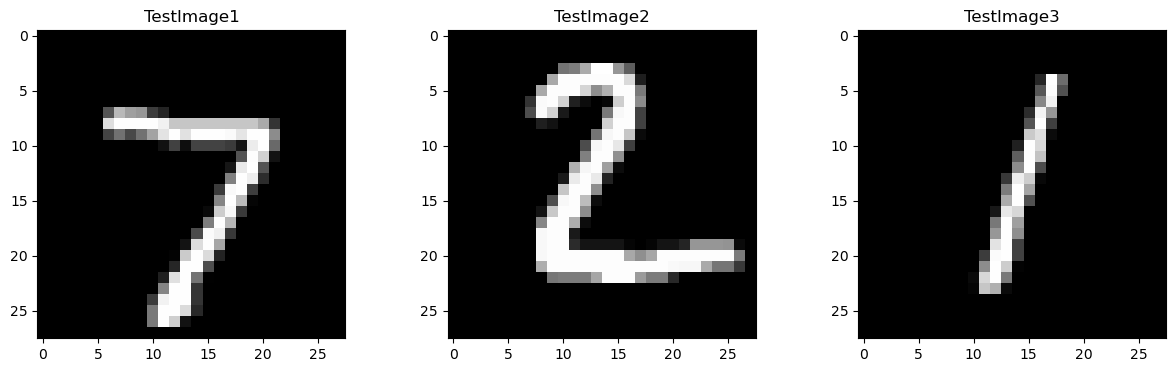

In [12]:
new_K = 111
new_PC = v_ik[:,:new_K]

Y_nk_new = np.dot(X_ni,new_PC)
Xhat_ni_new = np.dot(Y_nk_new,new_PC.T)
Xhat_ni_plot_new = np.reshape(Xhat_ni_new,[10000,28,28])

n = 3

fig, ax = plt.subplots(1,n, figsize=(5*n,4))
for i in range(n):
    ax[i].imshow(Xhat_ni_plot_new[i,:,:],cmap = 'gray')
    ax[i].set_title(f'Projection{i+1}')
plt.show()

fig, ax = plt.subplots(1,n, figsize=(5*n,4))
for i in range(n):
    ax[i].imshow(test_images[i,:,:],cmap = 'gray')
    ax[i].set_title(f'TestImage{i+1}')
plt.show()

**6**. (optional) The principal components $Y_{nk}$ that we found above form a lower-dimensional representation of the original data $X_{ni}$ (the original data are 784-dimensional, whereas the reduced representation is $K$-dimensional). Since they retain most of the information in the original data, we can use the reduced representation to classify the data. From part 4 you may see that the principal components already represent features in the original data. Therefore we do not have to use convolutional networks. Construct a multi-layer perceptron and train it with the reduced data $Y_{nk}$ and the correct labels (`test_labels` array, convert to 10-d vectors first). You may use the `keras` package or our own `MultilayerPerceptron` class. See if you can achieve an accuracy comparable to using the original data.